In [1]:
import sys
import os
sys.path.append(os.getcwd()+"/../")
os.chdir(os.getcwd()+"/../")

In [3]:
from lib.data.preprocess import *

/home/takano/programs/anaconda3/envs/master-degree-proposals/lib/python3.8/site-packages/tqdm/std.py:702: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [6]:
train_df,_,_ = load_prepared()
train_df

session_id                        timestamp    item_id  category  \
0                12 2014-04-02 10:30:13.176000+00:00  214717867         0   
1                12 2014-04-02 10:33:12.621000+00:00  214717867         0   
2                28 2014-04-05 15:25:35.032000+00:00  214836789         0   
3                28 2014-04-05 15:27:11.668000+00:00  214836789         0   
4                28 2014-04-05 15:29:59.565000+00:00  214710804         0   
...             ...                              ...        ...       ...   
2257522    11561599 2014-09-28 05:21:06.600000+00:00  214853135       204   
2257523    11561599 2014-09-28 05:22:12.020000+00:00  214854165       204   
2257524    11561599 2014-09-28 05:23:41.517000+00:00  214854510       204   
2257525    11561599 2014-09-28 05:24:42.010000+00:00  214854146       204   
2257526    11561599 2014-09-28 05:26:47.335000+00:00  214858903       214   

         label  dwelltime  weekday  day  hour  month  week  item_id_prob  \
0        False  -0.374924        2    2     1      4    14      1.540943   
1        False   0.254591        2    2     1      4    14      1.540943   
2        False  -0.374924        5    5     2      4    14     -0.422963   
3        False  -0.037307        5    5     2      4    14     -0.422963   
4        False   0.212389        5    5     2      4    14     -0.422963   
...        ...        ...      ...  ...   ...    ...   ...           ...   
2257522  False  -0.287003        6   28     0      9    39     -0.422963   
2257523  False  -0.367890        6   28     0      9    39     -0.422963   
2257524  False   0.367130        6   28     0      9    39      3.504848   
2257525  False   4.298962        6   28     0      9    39     -0.422963   
2257526  False  -0.374924        6   28     0      9    39      5.468754   

         item_rank  price_dist_avg  
0        -0.331910        0.279293  
1        -0.331910        0.279293  
2        -0.331910        0.073634  
3        -0.331910        0.073634  
4        -0.331910        0.073634  
...            ...             ...  
2257522   2.059327        0.073634  
2257523  -0.331910        0.073634  
2257524  -0.066217        0.073634  
2257525   0.199476        0.073634  
2257526  -0.199064        0.073634  

[2257527 rows x 14 columns]

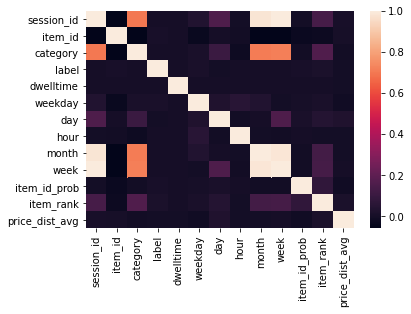

In [7]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
correlations = train_df.corr()
sns.heatmap(correlations)
plt.show()

In [163]:
import os
import types
import importlib
def reload_package(package):
    assert(hasattr(package, "__package__"))
    fn = package.__file__
    fn_dir = os.path.dirname(fn) + os.sep
    module_visit = {fn}
    del fn

    def reload_recursive_ex(module):
        importlib.reload(module)

        for module_child in vars(module).values():
            if isinstance(module_child, types.ModuleType):
                fn_child = getattr(module_child, "__file__", None)
                if (fn_child is not None) and fn_child.startswith(fn_dir):
                    if fn_child not in module_visit:
                        # print("reloading:", fn_child, "from", module)
                        module_visit.add(fn_child)
                        reload_recursive_ex(module_child)

    return reload_recursive_ex(package)


In [164]:
from lib.models.single_stage import generic as g
import importlib
reload_package(g)

In [136]:
dataset = g.construct_dataset()

Total train: (665979,)
Total train with undersampling: (7438,) Counter({1: 3743, 0: 3695})


In [137]:
np.zeros(1)

array([0.])

In [165]:
reload_package(g)
g.get_batches_from_all(dataset, 13, 1000, 0)

TypeError: object of type 'float' has no len()

In [118]:
l_b = 0  

a = np.array([0,0,0])
np.all(a==0)

True

In [92]:
x.shape

(7438,)

In [102]:

x,y,x_b,y_b,l_b = get_batches_from_all(dataset, 1000, l_b)
l_b,y_b

(7000,
 array([0.0, 0.0, array([1., 0., 1., 0.]), 0.0, array([0., 1.]),
        array([1., 1., 1., 1.]), array([1., 1., 0., 1., 0., 0.]), 0.0, 0.0,
        array([0., 0., 1., 0., 1.]), 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        array([1., 1.]), 0.0, 0.0, array([0., 1., 1.]), 0.0,
        array([1., 1., 1., 1., 1.]), 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        array([1.]), array([0., 0., 0., 1., 0.]),
        array([0., 1., 0., 1., 0., 0., 0., 0.]), 0.0,
        array([0., 0., 1., 0., 0., 0.]), array([1., 1.]), 0.0,
        array([0., 0., 0., 1.]), array([1., 1.]), array([1., 0.]),
        array([0., 0., 0., 1.]), array([1., 1., 1.]),
        array([0., 1., 1., 0.]), array([1.]), array([0., 1.]), 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        array([1., 0., 0., 0., 0.]), 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, array([1., 0.]),
        array([0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.]), 0.0,
        0.0, array([0., 1., 1., 1., 0.]), array

In [94]:
from sklearn.preprocessing import LabelBinarizer

  
o_train, train_buyers, train_nonbuyers = load_with_filters("train")
X_train, y_train_class, y_train_items, SIT_train = o_train
X_train_buyer, y_train_buyer = train_buyers 

In [32]:
y_train_buyer[0:20], y_train_buyer_t[0:20]

(array([array([1., 1., 1., 1., 1., 1., 1.]), array([1., 1.]),
        array([1., 1., 1., 1.]), array([1., 1., 0.]), array([1., 1., 0.]),
        array([0., 1., 1.]), array([1., 1., 0., 0., 0., 0.]),
        array([1., 1., 1.]), array([0., 0., 1., 1.]),
        array([1., 1., 1., 1., 1., 0., 1., 1., 1., 1.]),
        array([0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0.]),
        array([0., 1., 1., 1., 1.]), array([1., 1., 1., 1.]),
        array([0., 0., 1., 1., 1., 1., 1., 1., 1., 1.]),
        array([1., 1., 1., 1., 1., 1., 1., 1.]),
        array([1., 0., 1., 1., 1., 1., 1., 1.]),
        array([0., 1., 1., 0., 1.]), array([1.]),
        array([1., 1., 1., 0., 0., 1., 1.]),
        array([0., 0., 0., 1., 1., 1., 1.])], dtype=object),
 array([[0, 1],
        [0, 1],
        [0, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [0, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [0, 1],
        [1, 1],
        [0, 1],
        [1, 1],
